# Wyzwanie: Analiza tekstu o Data Science

> *W tym notatniku eksperymentujemy z użyciem różnych URL - artykułu z Wikipedii o Machine Learning. Możesz zauważyć, że w przeciwieństwie do Data Science, ten artykuł zawiera wiele terminów, co sprawia, że analiza staje się bardziej problematyczna. Musimy wymyślić inny sposób na oczyszczenie danych po ekstrakcji słów kluczowych, aby pozbyć się niektórych częstych, ale mało znaczących kombinacji słów.*

W tym przykładzie wykonamy proste ćwiczenie, które obejmuje wszystkie kroki tradycyjnego procesu Data Science. Nie musisz pisać żadnego kodu, możesz po prostu kliknąć na poniższe komórki, aby je uruchomić i zaobserwować wynik. Jako wyzwanie, zachęcamy Cię do wypróbowania tego kodu z różnymi danymi.

## Cel

W tej lekcji omawialiśmy różne koncepcje związane z Data Science. Spróbujmy odkryć więcej powiązanych koncepcji, wykonując **eksplorację tekstu**. Zaczniemy od tekstu o Data Science, wyodrębnimy z niego słowa kluczowe, a następnie spróbujemy zwizualizować wynik.

Jako tekst użyjemy strony o Data Science z Wikipedii:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Krok 1: Pobieranie danych

Pierwszym krokiem w każdym procesie analizy danych jest pobranie danych. Użyjemy do tego biblioteki `requests`:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Krok 2: Przekształcanie danych

Kolejnym krokiem jest przekształcenie danych w formę odpowiednią do przetwarzania. W naszym przypadku pobraliśmy kod źródłowy HTML ze strony i musimy go zamienić na zwykły tekst.

Istnieje wiele sposobów, aby to zrobić. Skorzystamy z najprostszego wbudowanego obiektu [HTMLParser](https://docs.python.org/3/library/html.parser.html) w Pythonie. Musimy rozszerzyć klasę `HTMLParser` i zdefiniować kod, który będzie zbierał cały tekst znajdujący się wewnątrz znaczników HTML, z wyjątkiem znaczników `<script>` i `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Krok 3: Uzyskiwanie wniosków

Najważniejszym krokiem jest przekształcenie naszych danych w formę, z której możemy wyciągnąć wnioski. W naszym przypadku chcemy wyodrębnić słowa kluczowe z tekstu i sprawdzić, które z nich są bardziej znaczące.

Użyjemy biblioteki Python o nazwie [RAKE](https://github.com/aneesha/RAKE) do ekstrakcji słów kluczowych. Najpierw zainstalujmy tę bibliotekę, jeśli nie jest jeszcze dostępna:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Główna funkcjonalność jest dostępna z obiektu `Rake`, który możemy dostosować za pomocą niektórych parametrów. W naszym przypadku ustawimy minimalną długość słowa kluczowego na 5 znaków, minimalną częstotliwość występowania słowa kluczowego w dokumencie na 3 oraz maksymalną liczbę słów w słowie kluczowym na 2. Możesz swobodnie eksperymentować z innymi wartościami i obserwować wynik.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Uzyskaliśmy listę terminów wraz z przypisanym stopniem ważności. Jak widać, najbardziej istotne dziedziny, takie jak uczenie maszynowe i big data, znajdują się na szczycie listy.

## Krok 4: Wizualizacja Wyniku

Ludzie najlepiej interpretują dane w formie wizualnej. Dlatego często warto zwizualizować dane, aby wyciągnąć pewne wnioski. Możemy użyć biblioteki `matplotlib` w Pythonie, aby przedstawić prosty rozkład słów kluczowych wraz z ich istotnością:


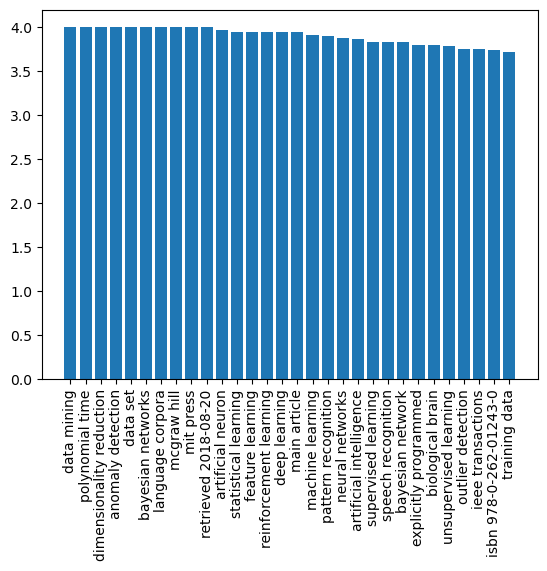

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Istnieje jednak jeszcze lepszy sposób na wizualizację częstotliwości słów - za pomocą **Word Cloud**. Będziemy musieli zainstalować kolejną bibliotekę, aby wygenerować chmurę słów z naszej listy słów kluczowych.


In [71]:
!{sys.executable} -m pip install wordcloud

Obiekt `WordCloud` jest odpowiedzialny za przyjmowanie oryginalnego tekstu lub wstępnie obliczonej listy słów z ich częstotliwościami i zwraca obraz, który następnie można wyświetlić za pomocą `matplotlib`:


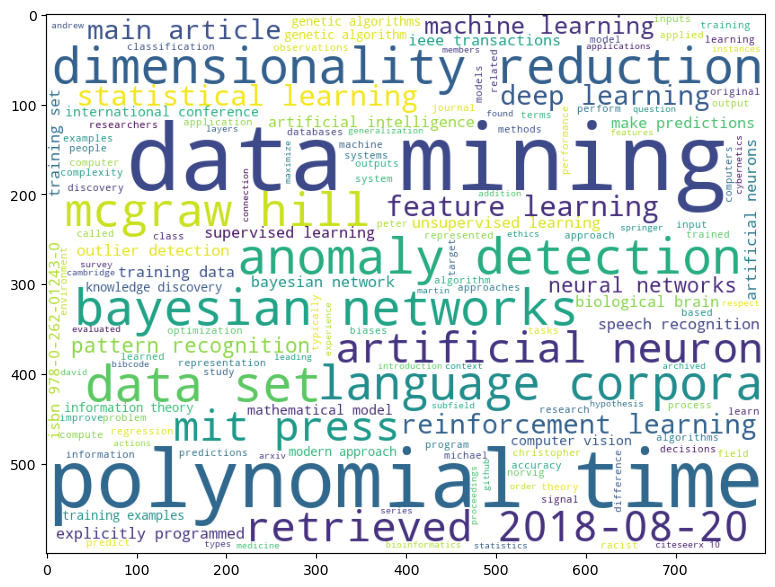

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Możemy również przekazać oryginalny tekst do `WordCloud` - zobaczmy, czy uda nam się uzyskać podobny wynik:


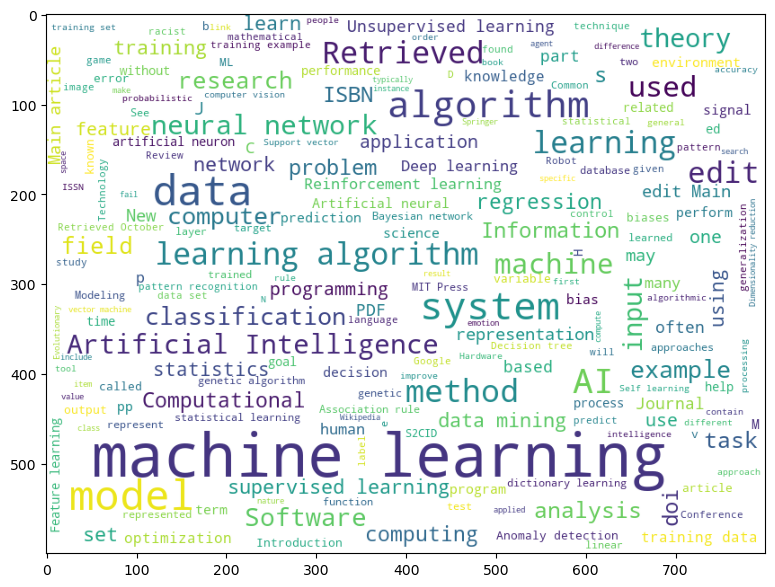

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Możesz zauważyć, że chmura słów wygląda teraz bardziej imponująco, ale zawiera również sporo szumu (np. niepowiązane słowa, takie jak `Retrieved on`). Dodatkowo, otrzymujemy mniej słów kluczowych składających się z dwóch wyrazów, takich jak *data scientist* czy *computer science*. Dzieje się tak, ponieważ algorytm RAKE znacznie lepiej radzi sobie z wybieraniem odpowiednich słów kluczowych z tekstu. Ten przykład ilustruje, jak ważne jest wstępne przetwarzanie i czyszczenie danych, ponieważ klarowny obraz na końcu pozwala podejmować lepsze decyzje.

W tym ćwiczeniu przeszliśmy przez prosty proces wydobywania sensu z tekstu z Wikipedii w formie słów kluczowych i chmury słów. Ten przykład jest dość prosty, ale dobrze pokazuje wszystkie typowe kroki, jakie podejmuje data scientist podczas pracy z danymi, począwszy od pozyskiwania danych, aż po wizualizację.

W naszym kursie omówimy wszystkie te kroki szczegółowo.



---

**Zastrzeżenie**:  
Ten dokument został przetłumaczony za pomocą usługi tłumaczeniowej AI [Co-op Translator](https://github.com/Azure/co-op-translator). Chociaż dokładamy wszelkich starań, aby tłumaczenie było precyzyjne, prosimy pamiętać, że automatyczne tłumaczenia mogą zawierać błędy lub nieścisłości. Oryginalny dokument w jego rodzimym języku powinien być uznawany za wiarygodne źródło. W przypadku informacji krytycznych zaleca się skorzystanie z profesjonalnego tłumaczenia wykonanego przez człowieka. Nie ponosimy odpowiedzialności za jakiekolwiek nieporozumienia lub błędne interpretacje wynikające z korzystania z tego tłumaczenia.
